In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data_xvals = np.atleast_2d( [ 1.0, 3.0, 5.0, 6.0, 7.0, 8.0 ] )
data_yvals = np.sin( data_xvals )
xtests = np.arange(-2, 10, 0.01)

In [3]:
def linear_kernel(noise=0):
    matrix = np.dot(data_xvals.T, data_xvals)
    for i in range(data_xvals.shape[1]):
        for j in range(data_xvals.shape[1]):
            if data_xvals[0][i] == data_xvals[0][j]:
                matrix[i][j] += noise
#     vals = np.array([data_xvals[0][i] == data_xvals[0][j] 
#                      for i in range(matrix.shape[0]) 
#                      for j in range(matrix.shape[1])]).reshape(data_xvals.shape[1],data_xvals.shape[1])
#     return np.add(matrix, noise, where=vals)
    return matrix

In [4]:
def gaussian_kernel(bandwidth=1,noise=0):
    retmat = np.zeros((data_xvals.shape[1], data_xvals.shape[1]))
    for i in range(data_xvals.shape[1]):
        retmat[i] += np.exp( -0.5 * np.power( (data_xvals[0][i] - data_xvals[0]), 2 )  / bandwidth )
        for j in range(data_xvals.shape[1]):
            if data_xvals[0][i] == data_xvals[0][j]:
                retmat[i][j] += noise
#     vals = np.array([data_xvals[0][i] == data_xvals[0][j]
#                      for i in range(retmat.shape[0]) 
#                      for j in range(retmat.shape[1])]).reshape(data_xvals.shape[1],data_xvals.shape[1])
#     return np.add(retmat, noise, where=vals)
    return retmat

In [5]:
def polynomial_kernel(d=3, noise=0):
    matrix = np.power( ( 1 + np.dot(data_xvals.T, data_xvals) ), d )
#     vals = np.array([data_xvals[0][i] == data_xvals[0][j] 
#                      for i in range(matrix.shape[0]) 
#                      for j in range(matrix.shape[1])]).reshape(data_xvals.shape[1],data_xvals.shape[1])
#     return np.add(matrix, noise, where=vals)
    for i in range(data_xvals.shape[1]):
        for j in range(data_xvals.shape[1]):
            if data_xvals[0][i] == data_xvals[0][j]:
                matrix[i][j] += noise
                
    return matrix

In [6]:
def curve(kern, data_xvals, data_yvals, xtests, ctype, args=3, noise=0):
    out_mu = np.zeros((xtests.shape))
    out_sig = np.zeros((xtests.shape))
    inv = np.linalg.pinv(kern)
    for j, xtest in enumerate(xtests):
        x_arr = ctype(data_xvals[0], xtest, args, noise)
        mu_p = 0 + np.dot( x_arr, np.dot(inv, data_yvals.T) )
        out_mu[j] += mu_p
        sigma_p = ctype(xtest, xtest, args, noise) - np.dot( x_arr, np.dot(inv, x_arr.T) )
        out_sig[j] += sigma_p
        
    return out_mu, out_sig

def lin_kx(data_xvals, xtest, args=0, noise=0):
    retval = data_xvals * xtest
    if retval.shape:
        for i in range(retval.shape[0]):
            if data_xvals[i] == xtest:
                retval[i] += noise
    elif data_xvals == xtest:
        retval += noise
    return retval
        

def poly_kx(data_xvals, xtest, d=3, noise=0):
    retval = np.power(( 1 + (data_xvals * xtest) ), d)
    if data_xvals.shape:
        for i in range(data_xvals.shape[0]):
            if data_xvals[i] == xtest:
                retval[i] += noise
    elif data_xvals == xtest:
        retval += noise
    return retval

def gaus_kx(data_xvals, xtest, bandwidth=1, noise=0):
    retval = np.exp( -0.5 * np.power( (data_xvals - xtest), 2 ) / bandwidth )
    if data_xvals.shape:
        for i in range(data_xvals.shape[0]):
            if data_xvals[i] == xtest:
                retval[i] += noise
    elif data_xvals == xtest:
        retval += noise
    return retval

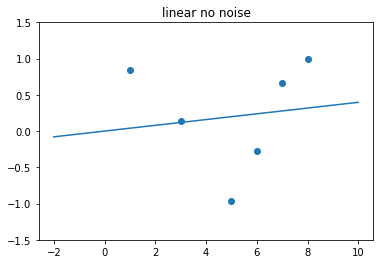

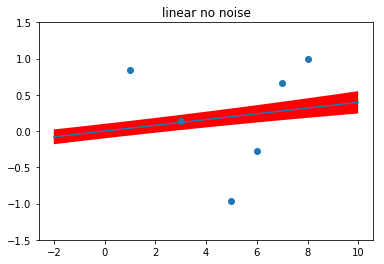

In [7]:
lin_kern = linear_kernel()

mu_p, sig_p = curve(lin_kern, data_xvals, data_yvals, xtests, lin_kx)

plt.plot(xtests, mu_p)
plt.ylim(-1.5, 1.5)
plt.gca().fill_between(xtests, mu_p - sig_p, sig_p + mu_p, facecolor='r')
plt.scatter(data_xvals[0],data_yvals[0])
plt.title("linear no noise")
plt.show()

lin_kern = linear_kernel(noise=0.1)
mu_p, sig_p = curve(lin_kern, data_xvals, data_yvals, xtests, lin_kx, noise=0.1)

plt.plot(xtests, mu_p)
plt.ylim(-1.5, 1.5)
plt.gca().fill_between(xtests, mu_p - sig_p, sig_p + mu_p, facecolor='r')
plt.scatter(data_xvals[0],data_yvals[0])
plt.title("linear no noise")
plt.show()

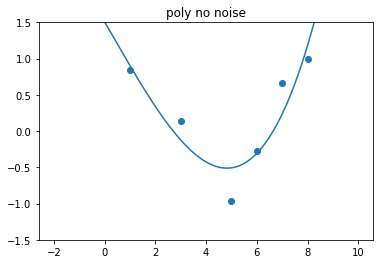

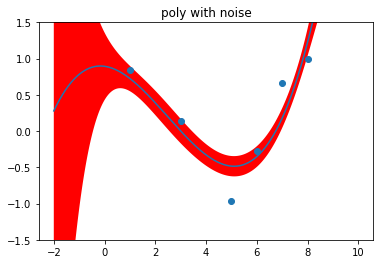

In [8]:
poly_kern = polynomial_kernel()

mu_p, sig_p = curve(poly_kern, data_xvals, data_yvals, xtests, poly_kx)

plt.plot(xtests, mu_p)
plt.ylim(-1.5, 1.5)
plt.gca().fill_between(xtests, -sig_p + mu_p, sig_p + mu_p, facecolor='r')
plt.scatter(data_xvals[0],data_yvals[0])
plt.title("poly no noise")
plt.show()

poly_kern = polynomial_kernel(noise=0.1)
mu_p, sig_p = curve(poly_kern, data_xvals, data_yvals, xtests, poly_kx, noise=0.1)

plt.plot(xtests, mu_p)
plt.ylim(-1.5, 1.5)
plt.gca().fill_between(xtests, -sig_p + mu_p, sig_p + mu_p, facecolor='r')
plt.scatter(data_xvals[0],data_yvals[0])
plt.title("poly with noise")
plt.show()

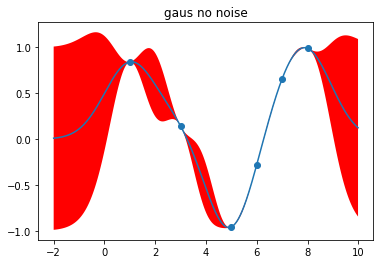

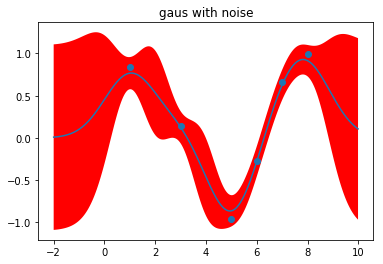

In [9]:
gaus_kern = gaussian_kernel()
mu_p, sig_p = curve(gaus_kern, data_xvals, data_yvals, xtests, gaus_kx, 1)

plt.plot(xtests, mu_p)
plt.gca().fill_between(xtests, -sig_p + mu_p, sig_p + mu_p, facecolor='r')
plt.scatter(data_xvals[0],data_yvals[0])
plt.title("gaus no noise")
plt.show()

gaus_kern = gaussian_kernel(noise=0.1)
mu_p, sig_p = curve(gaus_kern, data_xvals, data_yvals, xtests, gaus_kx, 1, noise=0.1)

plt.plot(xtests, mu_p)
plt.gca().fill_between(xtests, -sig_p + mu_p, sig_p + mu_p, facecolor='r')
plt.scatter(data_xvals[0],data_yvals[0])
plt.title("gaus with noise")
plt.show()

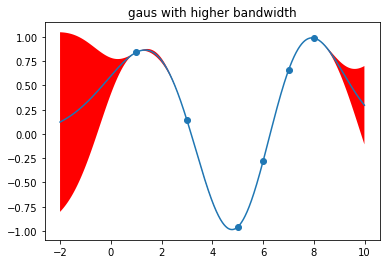

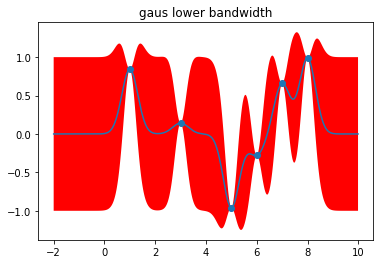

In [10]:
gaus_kern = gaussian_kernel(3)
mu_p, sig_p = curve(gaus_kern, data_xvals, data_yvals, xtests, gaus_kx, 3)

plt.plot(xtests, mu_p)
plt.gca().fill_between(xtests, -sig_p + mu_p, sig_p + mu_p, facecolor='r')
plt.scatter(data_xvals[0],data_yvals[0])
plt.title("gaus with higher bandwidth")
plt.show()

# We can see that with a higher bandwidth the gaussian kernel has lower variance, 
# shown by fewer and smaller error bars

gaus_kern = gaussian_kernel(0.1)
mu_p, sig_p = curve(gaus_kern, data_xvals, data_yvals, xtests, gaus_kx, 0.1)

plt.plot(xtests, mu_p)
plt.gca().fill_between(xtests, -sig_p + mu_p, sig_p + mu_p, facecolor='r')
plt.scatter(data_xvals[0],data_yvals[0])
plt.title("gaus lower bandwidth")
plt.show()

# With the lower bandwidth we get more variance and a more complicated mean line over the test point values.
# It is not as smooth with a lower bandwidth

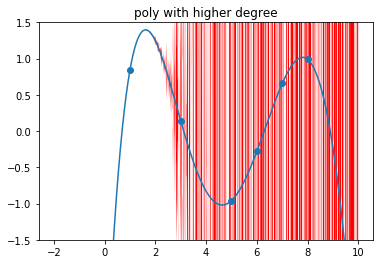

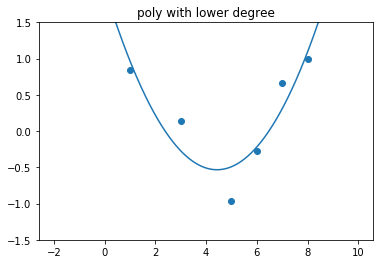

In [11]:
poly_kern = polynomial_kernel(5)
mu_p, sig_p = curve(poly_kern, data_xvals, data_yvals, xtests, poly_kx, 5)

plt.plot(xtests, mu_p)
plt.ylim(-1.5, 1.5)
plt.gca().fill_between(xtests, -sig_p + mu_p, sig_p + mu_p, facecolor='r')
plt.scatter(data_xvals[0],data_yvals[0])
plt.title("poly with higher degree")
plt.show()

# With a higher degree polynomial we are able to get more curves in our estimation line.
# However, the variance is increased by a lot.  

poly_kern = polynomial_kernel(2)
mu_p, sig_p = curve(poly_kern, data_xvals, data_yvals, xtests, poly_kx, 2)

plt.plot(xtests, mu_p)
plt.ylim(-1.5, 1.5)
plt.gca().fill_between(xtests, -sig_p + mu_p, sig_p + mu_p, facecolor='r')
plt.scatter(data_xvals[0],data_yvals[0])
plt.title("poly with lower degree")
plt.show()
# The lower degree polynomial is just not able to fit the dat points as well.  
# Here we see a quadratic curve that is better than a linear regression, 
# but doesn't fit the points as well as the polynomial to the fifth degree, like we have above.  